# **Wine quality prediction using svc classifiction model**

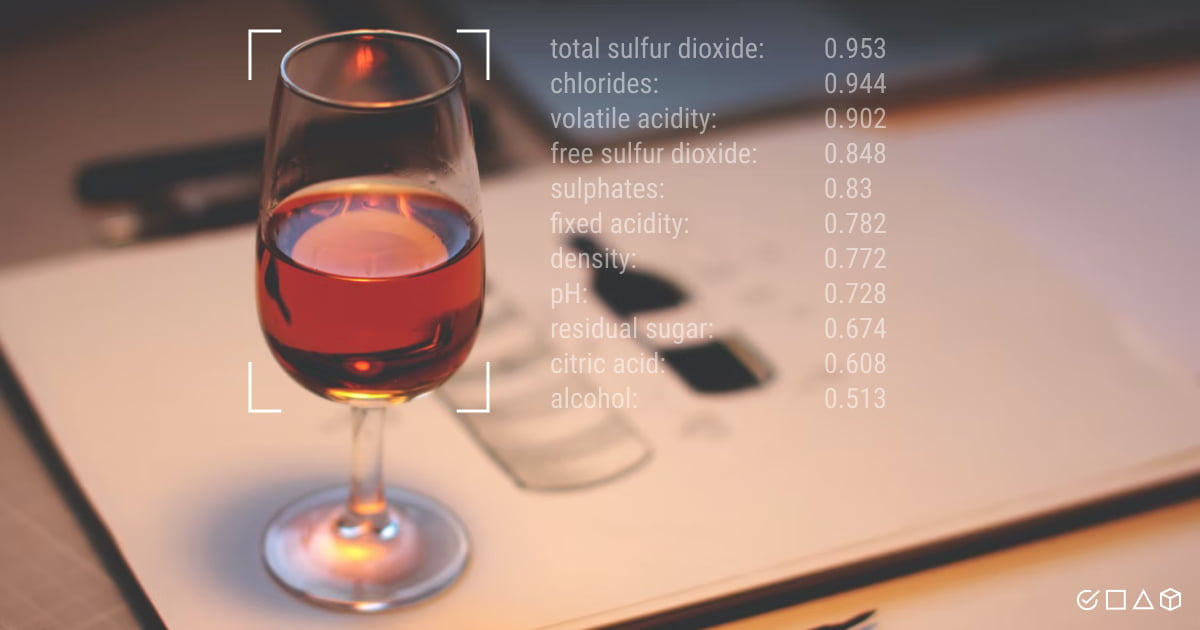

## **Problem Statement**
* To predict the quality of wine given the eleven measured parameters. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine.

## **Importing Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv('C://Users//Bikash//Downloads//winequality-red.csv',sep=';')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

## **EDA**

In [6]:
df.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

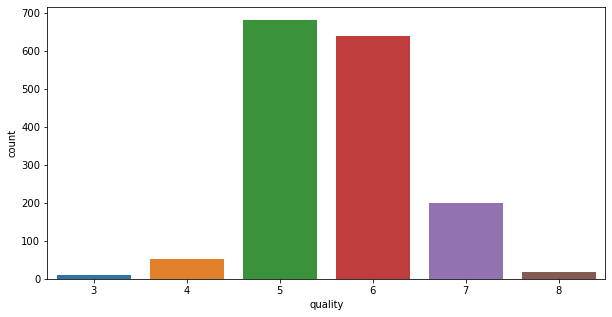

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['quality'])
plt.show()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

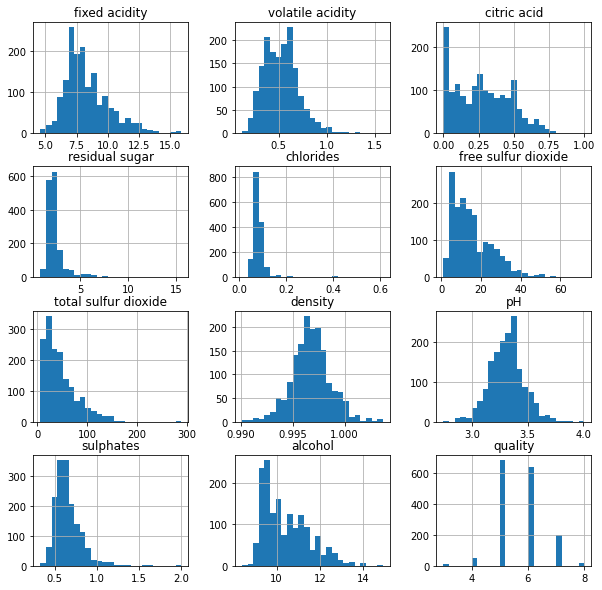

In [8]:
df.hist(bins=25,figsize=(10,10))

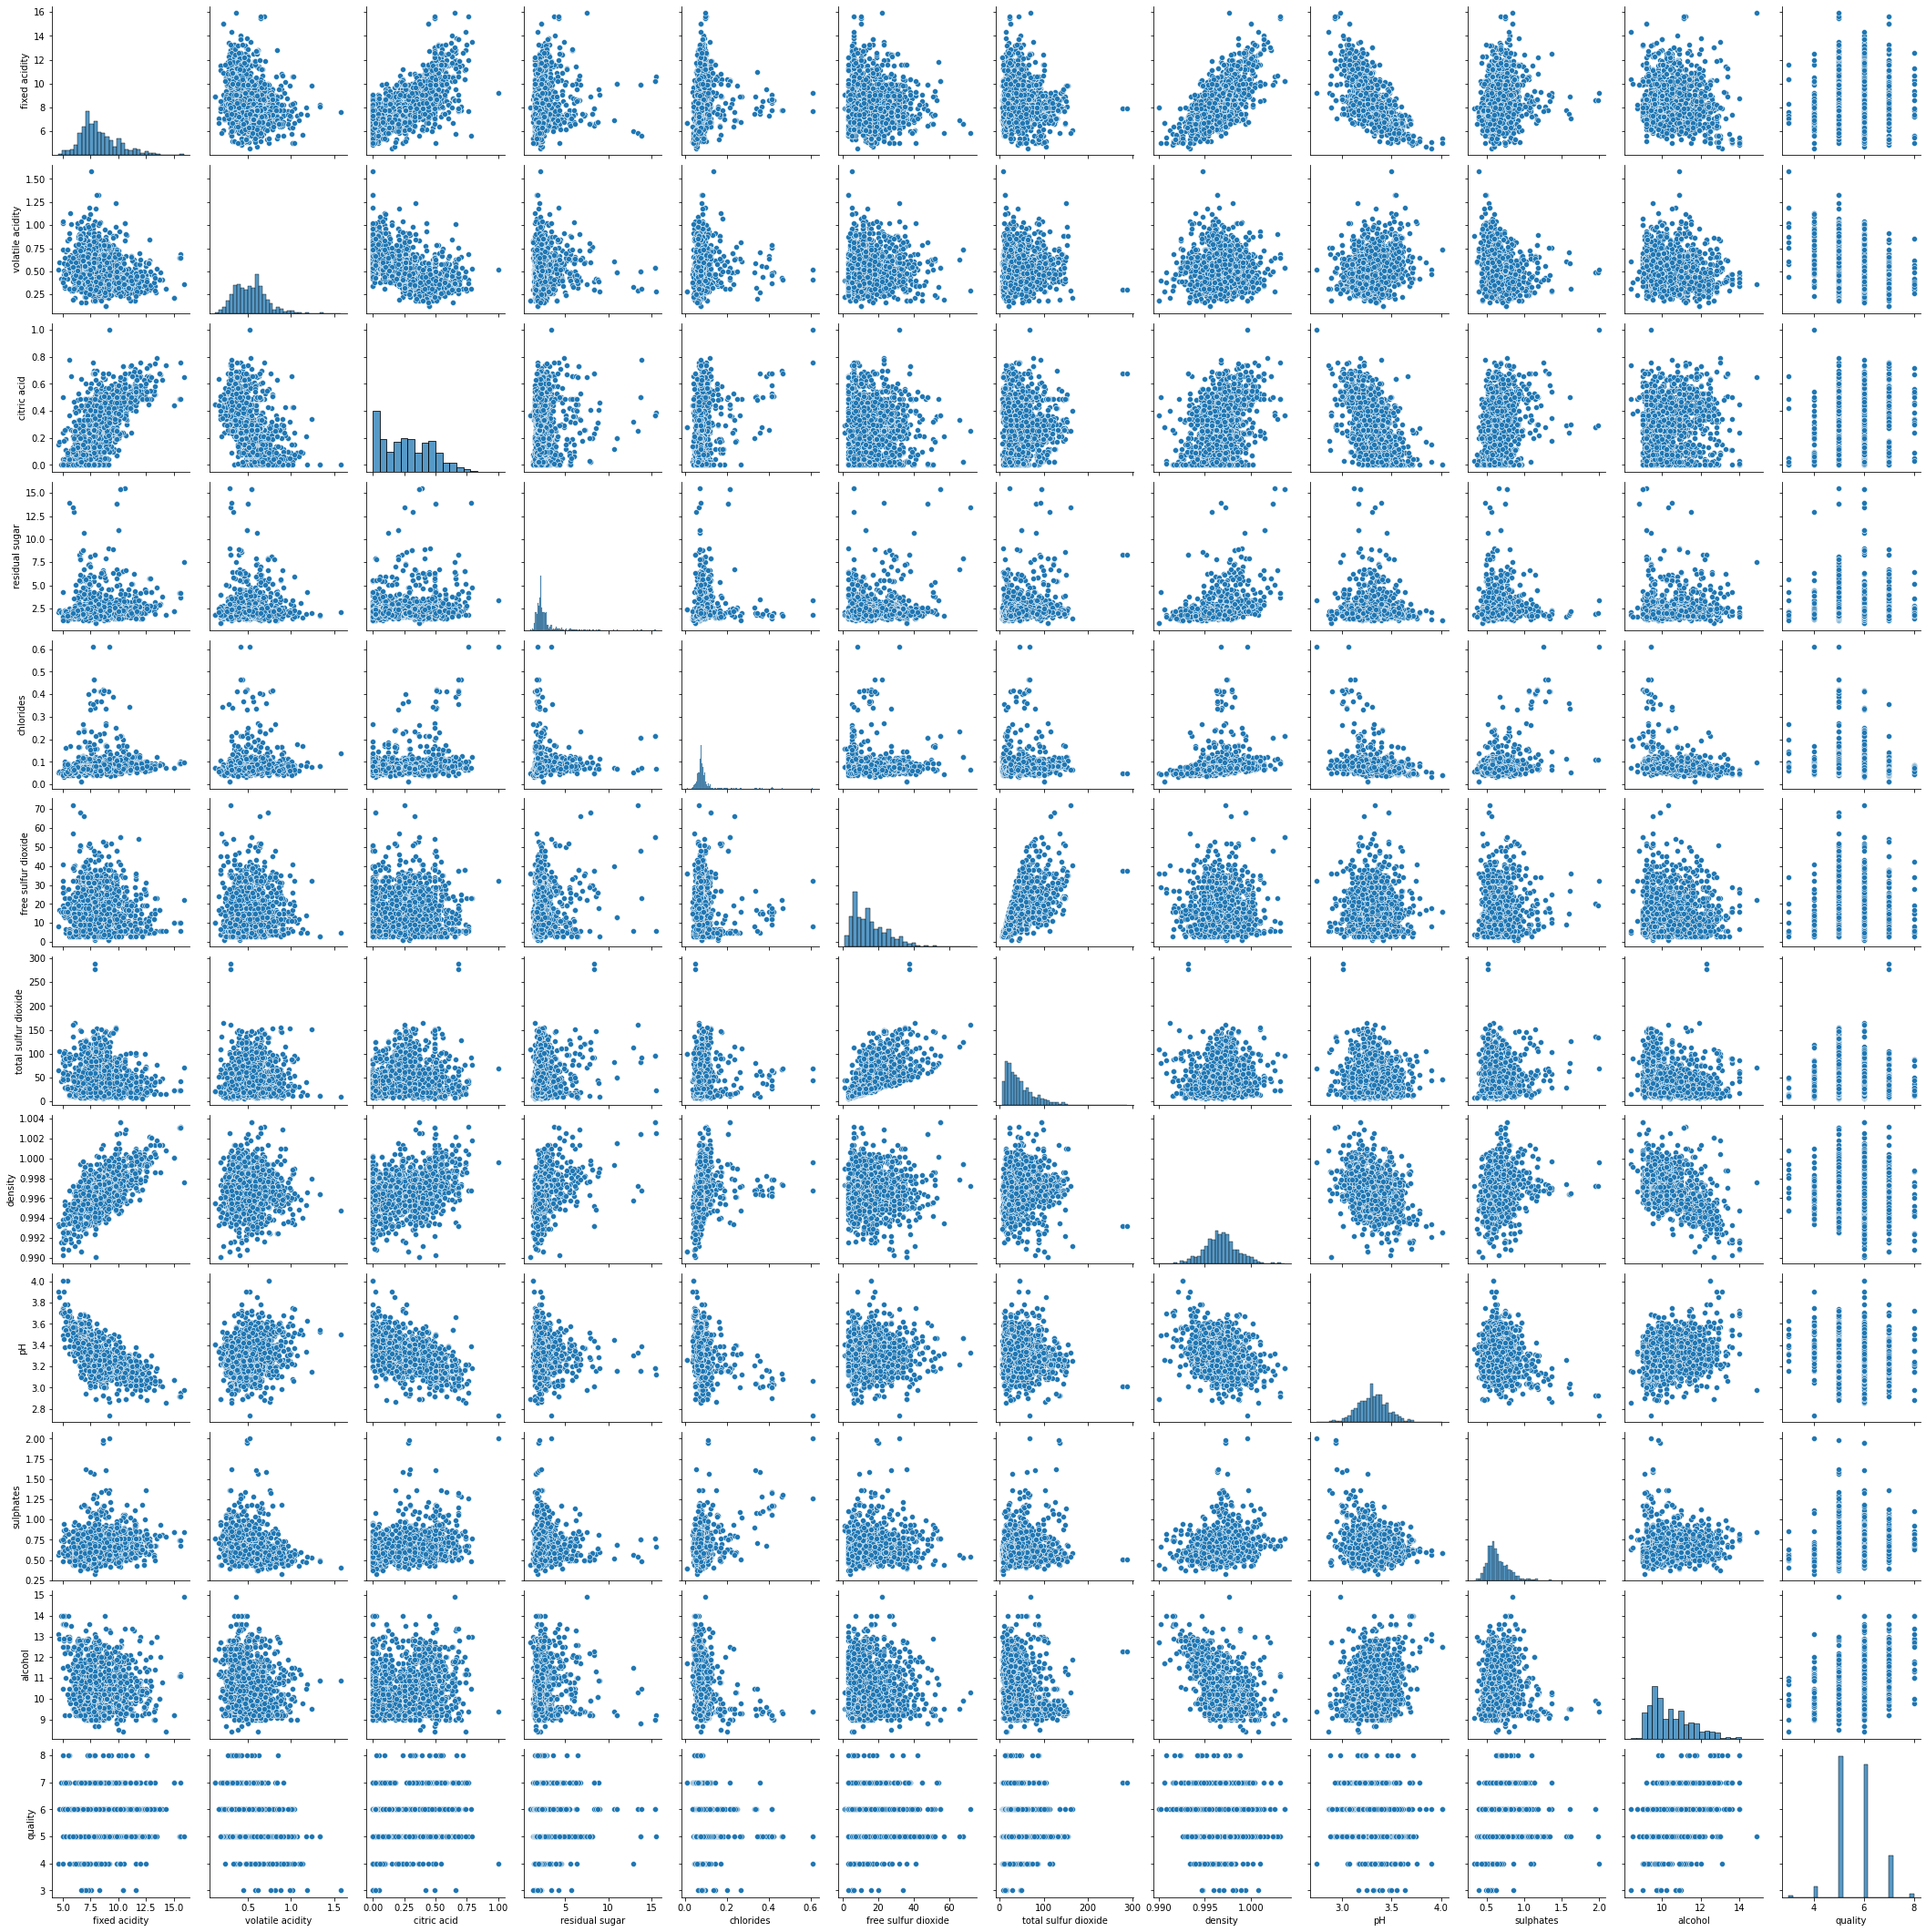

In [9]:
sns.pairplot(df)

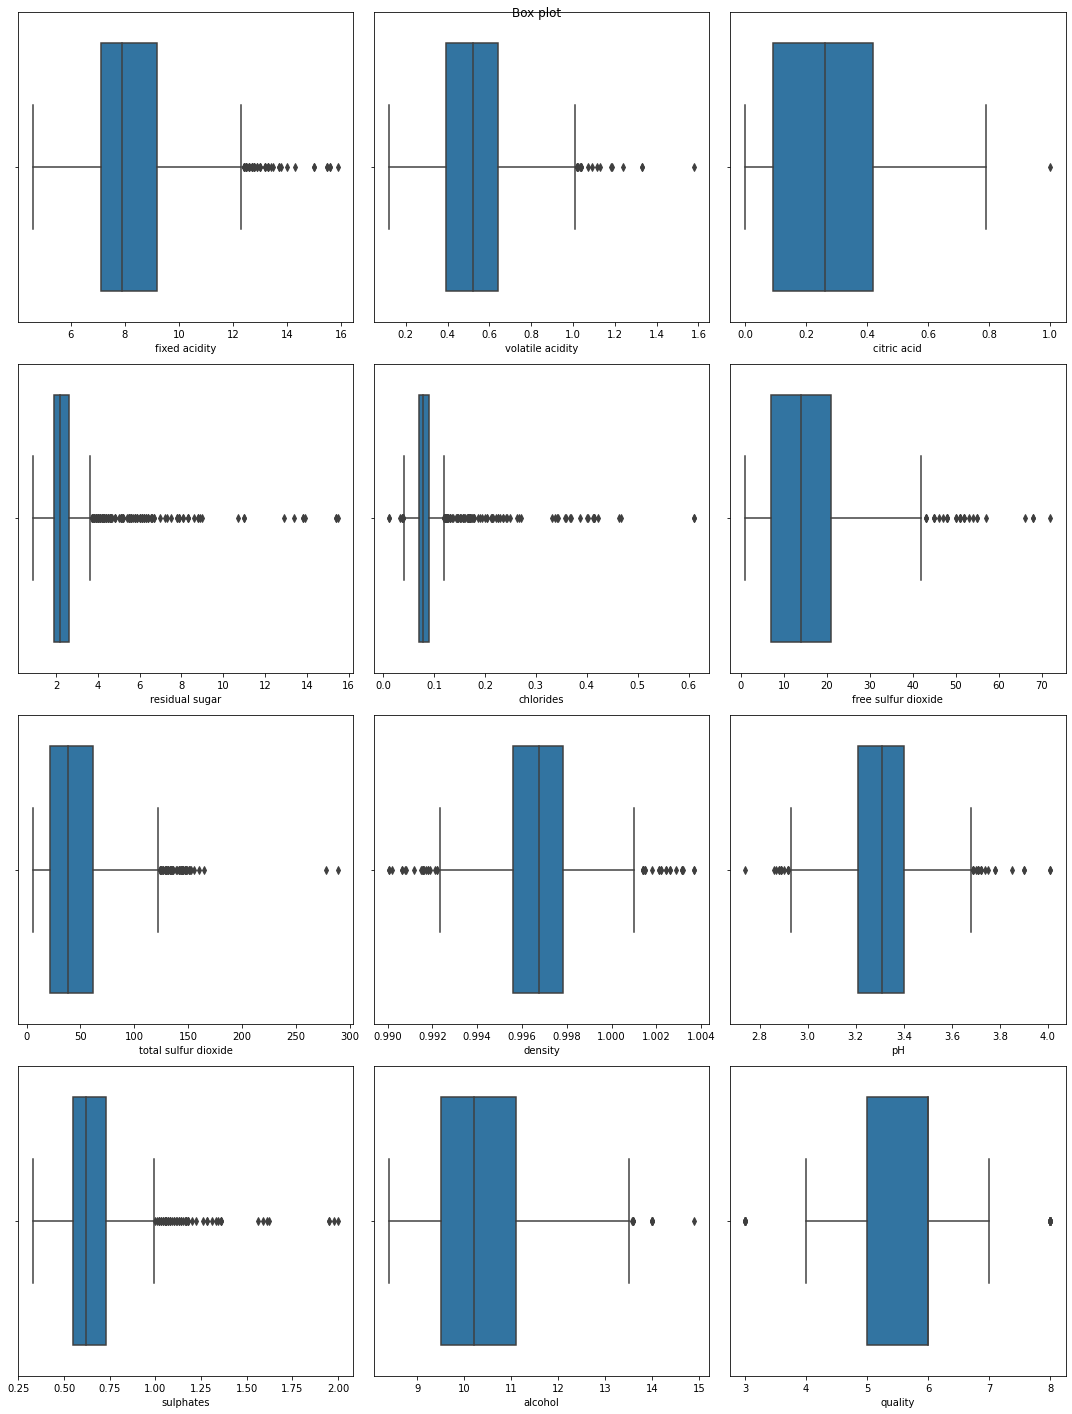

In [10]:
plt.figure(figsize=(15,20))
plt.suptitle("Box plot")
for i in range(0,len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[df.columns[i]])
    plt.tight_layout()

In [11]:
df.columns[0]

'fixed acidity'

<AxesSubplot:>

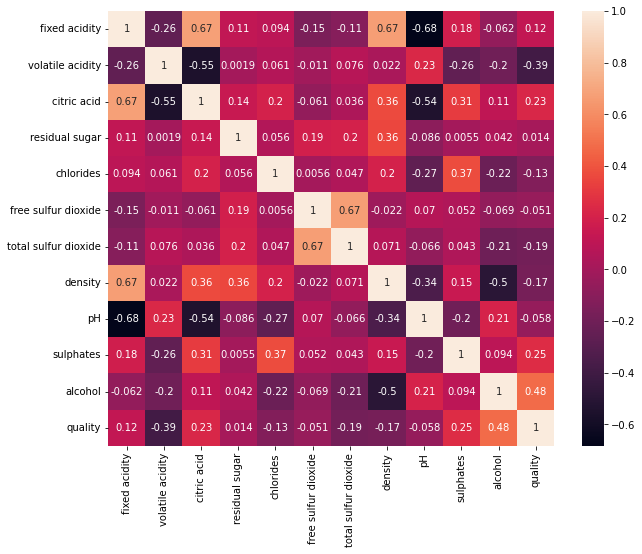

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## **data preprocessing**

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.duplicated().sum()

240

In [15]:
df=df.drop_duplicates()

In [16]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [17]:
df.shape

(1359, 12)

In [18]:
df.duplicated().sum()

0

In [44]:
out_col=['free sulfur dioxide','alcohol','pH']
for i in range(len(out_col)):
    IQR=df[out_col[i]].quantile(0.75)-df[out_col[i]].quantile(0.25)
    minimum = df[out_col[i]].quantile(0.25) - (1.5*IQR)
    maximum = df[out_col[i]].quantile(0.75) + (1.5*IQR)
    df= df[df[out_col[i]]<= maximum]
    df= df[df[out_col[i]]>= minimum]

In [45]:
df.shape

(1272, 12)

## **train test split**

In [46]:
X= df.drop('quality',axis=1)
y=df['quality']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [48]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2               7.8             0.760         0.04             2.3      0.092   
7               7.3             0.650         0.00             1.2      0.065   
709             9.7             0.310         0.47             1.6      0.062   
378            11.4             0.625         0.66             6.2      0.088   
1378            7.2             0.450         0.15             2.0      0.078   
...             ...               ...          ...             ...        ...   
1311            6.5             0.510         0.15             3.0      0.064   
1384            7.1             0.755         0.15             1.8      0.107   
1426            7.7             0.230         0.37             1.8      0.046   
1071            7.5             0.770         0.20             8.1      0.098   
1421            7.5             0.400         0.18             1.6      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2                    15.0                  54.0  0.99700  3.26       0.65   
7                    15.0                  21.0  0.99460  3.39       0.47   
709                  13.0                  33.0  0.99830  3.27       0.66   
378                   6.0                  24.0  0.99880  3.11       0.99   
1378                 10.0                  28.0  0.99609  3.29       0.51   
...                   ...                   ...      ...   ...        ...   
1311                 12.0                  27.0  0.99290  3.33       0.59   
1384                 20.0                  84.0  0.99593  3.19       0.50   
1426                 23.0                  60.0  0.99710  3.41       0.71   
1071                 30.0                  92.0  0.99892  3.20       0.58   
1421                 24.0                  58.0  0.99650  3.34       0.58   

      alcohol  
2         9.8  
7        10.0  
709      10.0  
378      13.3  
1378      9.9  
...       ...  
1311     12.8  
1384      9.5  
1426     12.1  
1071      9.2  
1421      9.4  

[852 rows x 11 columns]

In [49]:
y_train

2       5
7       7
709     6
378     6
1378    6
       ..
1311    6
1384    5
1426    6
1071    5
1421    5
Name: quality, Length: 852, dtype: int64

In [50]:
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
256             9.4              0.34         0.37            2.20      0.075   
1204            7.2              0.36         0.46            2.10      0.074   
882             8.4              0.31         0.29            3.10      0.194   
1506            6.8              0.81         0.05            2.00      0.070   
725             9.0              0.66         0.17            3.00      0.077   
...             ...               ...          ...             ...        ...   
550             6.8              0.51         0.01            2.10      0.074   
441            11.9              0.40         0.65            2.15      0.068   
293             6.9              0.36         0.25            2.40      0.098   
1466            7.3              0.48         0.32            2.10      0.062   
619            11.3              0.37         0.41            2.30      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
256                   5.0                  13.0  0.99800  3.22       0.62   
1204                 24.0                  44.0  0.99534  3.40       0.85   
882                  14.0                  26.0  0.99536  3.22       0.78   
1506                  6.0                  14.0  0.99562  3.51       0.66   
725                   5.0                  13.0  0.99760  3.29       0.55   
...                   ...                   ...      ...   ...        ...   
550                   9.0                  25.0  0.99580  3.33       0.56   
441                   7.0                  27.0  0.99880  3.06       0.68   
293                   5.0                  16.0  0.99640  3.41       0.60   
1466                 31.0                  54.0  0.99728  3.30       0.65   
619                   6.0                  16.0  0.99880  3.09       0.80   

      alcohol  
256       9.2  
1204     11.0  
882      12.0  
1506     10.8  
725      10.4  
...       ...  
550       9.5  
441      11.3  
293      10.1  
1466     10.0  
619       9.3  

[420 rows x 11 columns]

In [51]:
y_test

256     5
1204    7
882     6
1506    6
725     5
       ..
550     6
441     6
293     6
1466    7
619     5
Name: quality, Length: 420, dtype: int64

## **Feature Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [53]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        -0.344671          1.410584    -1.218566       -0.141626   0.106165   
1        -0.654503          0.753739    -1.426096       -0.993288  -0.504846   
2         0.832693         -1.276510     1.012377       -0.683593  -0.572736   
3         1.886124          0.604456     1.998142        2.877905   0.015644   
4        -0.716470         -0.440525    -0.647860       -0.373897  -0.210656   
..             ...               ...          ...             ...        ...   
847      -1.150235         -0.082246    -0.647860        0.400341  -0.527476   
848      -0.778436          1.380728    -0.647860       -0.528745   0.445615   
849      -0.406637         -1.754216     0.493553       -0.528745  -0.934817   
850      -0.530570          1.470298    -0.388448        4.348958   0.241945   
851      -0.530570         -0.739091    -0.492213       -0.683593  -0.188026   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              -0.012871              0.251154  0.155739 -0.292085   0.013067   
1              -0.012871             -0.727970 -1.219637  0.675069  -1.145265   
2              -0.231098             -0.371925  0.900734 -0.217688   0.077419   
3              -0.994893             -0.638958  1.187270 -1.408031   2.201027   
4              -0.558439             -0.520277 -0.365758 -0.068895  -0.887858   
..                   ...                   ...       ...       ...        ...   
847            -0.340212             -0.549947 -2.193861  0.228690  -0.373044   
848             0.532697              1.141266 -0.457450 -0.812859  -0.952210   
849             0.860038              0.429176  0.213046  0.823862   0.399177   
850             1.623833              1.378629  1.256039 -0.738463  -0.437396   
851             0.969152              0.369835 -0.130798  0.303087  -0.437396   

      alcohol  
0   -0.564284  
1   -0.373439  
2   -0.373439  
3    2.775500  
4   -0.468861  
..        ...  
847  2.298388  
848 -0.850551  
849  1.630431  
850 -1.136818  
851 -0.945973  

[852 rows x 11 columns]

## **Model training**

In [54]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

## **predicting**

In [55]:
y_pred=sv.predict(X_test)

## **Comparing predicted and actual test set result for svc model**

In [56]:
y_pred=np.array(y_pred)
y_test=np.array(y_test)
print(np.concatenate((np.round(y_pred.reshape(len(y_pred),1),1),y_test.reshape(len(y_test),1)),1))

[[6 5]
 [6 7]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [7 7]
 [5 5]
 [5 5]
 [6 7]
 [7 7]
 [5 6]
 [7 7]
 [6 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [6 7]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [6 5]
 [6 7]
 [6 8]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [5 6]
 [6 6]
 [6 6]
 [5 4]
 [5 4]
 [5 5]
 [6 6]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [6 7]
 [6 6]
 [6 7]
 [7 6]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [5 6]
 [5 5]
 [6 7]
 [6 6]
 [5 6]
 [6 5]
 [7 7]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [5 6]
 [5 5]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 6]
 [6 7]
 [6 6]
 [5 5]
 [5 6]
 [6 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 7]
 [6 5]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [6 5]
 [6 6]
 [6 7]

## **accuracy score**

In [57]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
acc

0.6190476190476191

### 61.9% accuracy .
### we will try hyperparameter tuning for increasing accuracy

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,30,50,100,500,1000], 
              'gamma': [1,0.1,0.01, 0.001, 0.0001,0.00001,0.000001],
              'kernel': ['rbf','sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.427 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.474 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.474 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.418 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.518 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.459 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.561 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rb

[CV 1/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.468 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.491 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.488 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.465 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.433 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.427 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.429 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 2/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.427 total time=   0.0s
[CV 3/5] END .C=1, gamma=0.0

[CV 4/5] END .C=10, gamma=1e-06, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 5/5] END .C=10, gamma=1e-06, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 1/5] END .........C=30, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 2/5] END .........C=30, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 3/5] END .........C=30, gamma=1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 4/5] END .........C=30, gamma=1, kernel=rbf;, score=0.488 total time=   0.0s
[CV 5/5] END .........C=30, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 1/5] END .....C=30, gamma=1, kernel=sigmoid;, score=0.456 total time=   0.0s
[CV 2/5] END .....C=30, gamma=1, kernel=sigmoid;, score=0.427 total time=   0.0s
[CV 3/5] END .....C=30, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 4/5] END .....C=30, gamma=1, kernel=sigmoid;, score=0.394 total time=   0.0s
[CV 5/5] END .....C=30, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 1/5] END .......C=30, ga

[CV 5/5] END .....C=50, gamma=0.001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .C=50, gamma=0.001, kernel=sigmoid;, score=0.538 total time=   0.0s
[CV 2/5] END .C=50, gamma=0.001, kernel=sigmoid;, score=0.579 total time=   0.0s
[CV 3/5] END .C=50, gamma=0.001, kernel=sigmoid;, score=0.553 total time=   0.0s
[CV 4/5] END .C=50, gamma=0.001, kernel=sigmoid;, score=0.559 total time=   0.0s
[CV 5/5] END .C=50, gamma=0.001, kernel=sigmoid;, score=0.565 total time=   0.0s
[CV 1/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.550 total time=   0.0s
[CV 2/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.529 total time=   0.0s
[CV 5/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.547 total time=   0.0s
[CV 1/5] END C=50, gamma=0.0001, kernel=sigmoid;, score=0.538 total time=   0.0s
[CV 2/5] END C=50, gamma=0.0

[CV 5/5] END C=100, gamma=1e-06, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 1/5] END ........C=500, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 2/5] END ........C=500, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 3/5] END ........C=500, gamma=1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 4/5] END ........C=500, gamma=1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 5/5] END ........C=500, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 1/5] END ....C=500, gamma=1, kernel=sigmoid;, score=0.439 total time=   0.0s
[CV 2/5] END ....C=500, gamma=1, kernel=sigmoid;, score=0.439 total time=   0.0s
[CV 3/5] END ....C=500, gamma=1, kernel=sigmoid;, score=0.418 total time=   0.0s
[CV 4/5] END ....C=500, gamma=1, kernel=sigmoid;, score=0.435 total time=   0.0s
[CV 5/5] END ....C=500, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 1/5] END ......C=500, gamma=0.1, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END ......C=500, ga

[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.532 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.579 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.559 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.547 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.532 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.567 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.565 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.559 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=1000, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30, 50, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [63]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [64]:

grid_search.best_estimator_

SVC(C=1, gamma=0.1)

## **prediction**



In [65]:
gr_pred=grid_search.predict(X_test)
acc=accuracy_score(gr_pred,y_test)
acc

0.6261904761904762

* Accuracy increased to 62.6 %